In [1]:
import json
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
from google.colab import drive

In [3]:
from os.path import exists

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# read in the data

In [5]:
## read in the athlete event data

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://www.pythontutorial.net/python-basics/python-check-if-file-exists/

In [6]:
all_df = []
file_index = 1
while (True):
  file_name = "/content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail" +  str(file_index) + ".csv"
  if (exists(file_name) == False):
    break
  print("Reading " + file_name)
  df = pd.read_csv(file_name)
  all_df.append(df)
  file_index += 1

df_athlete_event = pd.concat(all_df)






Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail1.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail2.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail3.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail4.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail5.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail6.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail7.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail8.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail9.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail10.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail11.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail12.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Division1PlayerDetail13.csv
Reading /content/gdrive/MyDrive/Tr

In [7]:
len(df_athlete_event)

958652

## read in the team athlete link data

In [8]:
df_div1_roster = pd.read_csv("/content/gdrive/MyDrive/TrackFieldData/Division1Players.csv")
df_div1_roster.head()


,Unnamed: 0,Team,TeamLink,Year,AthleteName,AthleteLink
0,0,Albany,/team/20591/track-and-field-outdoor,2023,Alessandro Saltsman,/athlete/21636225/track-and-field
1,1,Albany,/team/20591/track-and-field-outdoor,2023,Antonio Beltran,/athlete/16022935/track-and-field
2,2,Albany,/team/20591/track-and-field-outdoor,2023,Antwone Messado,/athlete/19271236/track-and-field
3,3,Albany,/team/20591/track-and-field-outdoor,2023,Brandon Garcia,/athlete/16154842/track-and-field
4,4,Albany,/team/20591/track-and-field-outdoor,2023,Charlie Hatzmann,/athlete/19271242/track-and-field


In [9]:
df_div1_roster["Team"] = df_div1_roster["Team"].str.strip()

# improve the athelete data

parse out the athlete Id (which is in the link, this will allow us to join to the event data)

In [10]:
df_athlete_event["AthleteId"] = df_athlete_event["AtheleteLink"].str.split("/").str[2]

parse out the season as a year and indoor/outdoor

In [11]:
df_athlete_event["Season"]

0          2023 Outdoor Season   Albany Collegiate  Fr 
1          2023 Outdoor Season   Albany Collegiate  Fr 
2          2023 Outdoor Season   Albany Collegiate  Fr 
3          2023 Outdoor Season   Albany Collegiate  Fr 
4          2023 Outdoor Season   Albany Collegiate  Fr 
                             ...                       
9152     2023 Indoor Season   Manhattan Collegiate  Fr 
9153     2023 Indoor Season   Manhattan Collegiate  Fr 
9154     2023 Indoor Season   Manhattan Collegiate  Fr 
9155     2023 Indoor Season   Manhattan Collegiate  Fr 
9156     2023 Indoor Season   Manhattan Collegiate  Fr 
Name: Season, Length: 958652, dtype: object

In [12]:
df_athlete_event["Season"].str.find("Season")

0       14
1       14
2       14
3       14
4       14
        ..
9152    13
9153    13
9154    13
9155    13
9156    13
Name: Season, Length: 958652, dtype: int64

In [13]:
df_athlete_event["SeasonBeginIndex"] = df_athlete_event["Season"].str.find("Season")


In [14]:
df_athlete_event["SeasonBeginIndex"]

0       14
1       14
2       14
3       14
4       14
        ..
9152    13
9153    13
9154    13
9155    13
9156    13
Name: SeasonBeginIndex, Length: 958652, dtype: int64

In [15]:
df_athlete_event.head()

,Unnamed: 0,AtheleteLink,Season,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,SeasonBeginIndex
0,0,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,8,14.42mPR,May 7,America East Outdoor Championships,1 F,21636225,14
1,1,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,16,43.38m,Apr 1,UCONN Dog Fight,1 F,21636225,14
2,2,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,4,48.67m,Apr 8,UMASS Flagship Opener,1 F,21636225,14
3,3,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,3,49.51mPR,May 7,America East Outdoor Championships,1 F,21636225,14
4,4,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,7,48.70m,May 11,West Point Twilight,1 F,21636225,14


In [16]:
df_athlete_event["SeasonFull"] = df_athlete_event.apply(lambda x: x["Season"][0:x["SeasonBeginIndex"]], axis=1)


In [17]:
df_athlete_event["SeasonFull"]

0        2023 Outdoor 
1        2023 Outdoor 
2        2023 Outdoor 
3        2023 Outdoor 
4        2023 Outdoor 
             ...      
9152      2023 Indoor 
9153      2023 Indoor 
9154      2023 Indoor 
9155      2023 Indoor 
9156      2023 Indoor 
Name: SeasonFull, Length: 958652, dtype: object

In [18]:
df_athlete_event["EventYear"] = df_athlete_event["SeasonFull"].str.split(" ").str[1]


In [19]:
df_athlete_event["SeasonName"]= df_athlete_event["SeasonFull"].str.split(" ").str[2]

In [20]:
df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" "), axis=1)

0          [Albany, Collegiate, , Fr]
1          [Albany, Collegiate, , Fr]
2          [Albany, Collegiate, , Fr]
3          [Albany, Collegiate, , Fr]
4          [Albany, Collegiate, , Fr]
                    ...              
9152    [Manhattan, Collegiate, , Fr]
9153    [Manhattan, Collegiate, , Fr]
9154    [Manhattan, Collegiate, , Fr]
9155    [Manhattan, Collegiate, , Fr]
9156    [Manhattan, Collegiate, , Fr]
Length: 958652, dtype: object

In [21]:
min(df_athlete_event.apply(lambda x: len(x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" ")), axis=1))

1

In [22]:
df_athlete_event["StudentGrade"] = df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" ")[len(x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" ")) -1 ], axis=1)

In [23]:
df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" "), axis=1)

0          [Albany, Collegiate, , Fr]
1          [Albany, Collegiate, , Fr]
2          [Albany, Collegiate, , Fr]
3          [Albany, Collegiate, , Fr]
4          [Albany, Collegiate, , Fr]
                    ...              
9152    [Manhattan, Collegiate, , Fr]
9153    [Manhattan, Collegiate, , Fr]
9154    [Manhattan, Collegiate, , Fr]
9155    [Manhattan, Collegiate, , Fr]
9156    [Manhattan, Collegiate, , Fr]
Length: 958652, dtype: object

In [24]:
df_athlete_event["SchoolAndSchoolType"] = df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip()[:len(x["Season"][x["SeasonBeginIndex"] + 7:].strip())-2], axis=1)

In [25]:
def get_school_level(df):
  if (df["SchoolAndSchoolType"].find("Collegiate") != -1):
    return "Collegiate"
  elif (df["SchoolAndSchoolType"].find("High School") != -1):
    return "HighSchool"
  else:
    return "Other"


In [26]:
df_athlete_event["SchoolLevel"] = df_athlete_event.apply(get_school_level, axis=1)

In [27]:
def get_school_name(df):
  if (df["SchoolAndSchoolType"].find("Collegiate") != -1):
      return df["SchoolAndSchoolType"][:df["SchoolAndSchoolType"].find("Collegiate")]
  elif (df["SchoolAndSchoolType"].find("High School") != -1):
      return df["SchoolAndSchoolType"][:df["SchoolAndSchoolType"].find("High")]
  else:
      return df["SchoolAndSchoolType"]

In [28]:
df_athlete_event["SchoolName"] = df_athlete_event.apply(get_school_name, axis=1)

In [29]:
df_athlete_event.head(5)

,Unnamed: 0,AtheleteLink,Season,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,SeasonBeginIndex,SeasonFull,EventYear,SeasonName,StudentGrade,SchoolAndSchoolType,SchoolLevel,SchoolName
0,0,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,8,14.42mPR,May 7,America East Outdoor Championships,1 F,21636225,14,2023 Outdoor,2023,Outdoor,Fr,Albany Collegiate,Collegiate,Albany
1,1,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,16,43.38m,Apr 1,UCONN Dog Fight,1 F,21636225,14,2023 Outdoor,2023,Outdoor,Fr,Albany Collegiate,Collegiate,Albany
2,2,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,4,48.67m,Apr 8,UMASS Flagship Opener,1 F,21636225,14,2023 Outdoor,2023,Outdoor,Fr,Albany Collegiate,Collegiate,Albany
3,3,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,3,49.51mPR,May 7,America East Outdoor Championships,1 F,21636225,14,2023 Outdoor,2023,Outdoor,Fr,Albany Collegiate,Collegiate,Albany
4,4,/athlete/21636225/track-and-field,2023 Outdoor Season Albany Collegiate Fr,Shot Put - 16lb,7,48.70m,May 11,West Point Twilight,1 F,21636225,14,2023 Outdoor,2023,Outdoor,Fr,Albany Collegiate,Collegiate,Albany


In [30]:
df_athlete_event["EventYear"] = df_athlete_event["EventYear"].astype(int)

In [31]:
# prompt: get the datatype for columns in dataframe df_athlete_event

df_athlete_event.dtypes


Unnamed: 0              int64
AtheleteLink           object
Season                 object
Event                  object
placement              object
Time                   object
Date                   object
MeetName               object
MeetCode               object
AthleteId              object
SeasonBeginIndex        int64
SeasonFull             object
EventYear               int64
SeasonName             object
StudentGrade           object
SchoolAndSchoolType    object
SchoolLevel            object
SchoolName             object
dtype: object

In [32]:
df_athelete_event_clean = df_athlete_event.drop(columns=["SeasonBeginIndex", "SeasonFull", "Season", "SchoolAndSchoolType"])


In [33]:
df_athelete_event_clean.head(50)

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
0,0,/athlete/21636225/track-and-field,Shot Put - 16lb,8,14.42mPR,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
1,1,/athlete/21636225/track-and-field,Shot Put - 16lb,16,43.38m,Apr 1,UCONN Dog Fight,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
2,2,/athlete/21636225/track-and-field,Shot Put - 16lb,4,48.67m,Apr 8,UMASS Flagship Opener,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
3,3,/athlete/21636225/track-and-field,Shot Put - 16lb,3,49.51mPR,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
4,4,/athlete/21636225/track-and-field,Shot Put - 16lb,7,48.70m,May 11,West Point Twilight,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
5,5,/athlete/21636225/track-and-field,Shot Put - 16lb,12,47.85mPR,Apr 1,UCONN Dog Fight,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
6,6,/athlete/21636225/track-and-field,Shot Put - 16lb,12,46.53m,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
7,7,/athlete/21636225/track-and-field,Shot Put - 16lb,17,22.22xPR,Jan 28,Dr. Sander Columbia Challenge,Col F,21636225,2023,Indoor,Fr,Collegiate,Albany
8,8,/athlete/21636225/track-and-field,Shot Put - 16lb,13,22.22x,Feb 4,Boston University Bruce Lehane Scarlet and Wh...,O F,21636225,2023,Indoor,Fr,Collegiate,Albany
9,9,/athlete/21636225/track-and-field,Shot Put - 16lb,,XXXX,Feb 19,America East Indoor Championships,1 F,21636225,2023,Indoor,Fr,Collegiate,Albany


# look at 200 meter dash data

In [34]:
df_200_meter = df_athelete_event_clean.loc[df_athelete_event_clean['Event']==(" 200 Meters ")]

In [35]:
#df_200_meter.loc[df_200_meter['EventYear'].str.contains("2019")]

In [36]:
df_200_meter_high_school= df_200_meter.loc[df_200_meter['SchoolLevel'].str.contains("HighSchool")]
df_200_meter_high_school

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
1736,1736,/athlete/12546444/track-and-field,200 Meters,3,22.22,Apr 8,Jerry Crews Invite,V F,12546444,2016,Outdoor,10,HighSchool,North Kansas City
1737,1737,/athlete/12546444/track-and-field,200 Meters,1,22.22PR,May 14,MSHSAA Class 5 District 8,V P,12546444,2016,Outdoor,10,HighSchool,North Kansas City
1738,1738,/athlete/12546444/track-and-field,200 Meters,2,22.22,May 14,MSHSAA Class 5 District 8,V F,12546444,2016,Outdoor,10,HighSchool,North Kansas City
1739,1739,/athlete/12546444/track-and-field,200 Meters,7,22.22,May 21,MSHSAA Class 5 Sectional 4,V F,12546444,2016,Outdoor,10,HighSchool,North Kansas City
1740,1740,/athlete/12546444/track-and-field,200 Meters,6,2:22.22,Apr 8,Jerry Crews Invite,V F,12546444,2016,Outdoor,10,HighSchool,North Kansas City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,6809,/athlete/10491908/track-and-field,200 Meters,1,22:22.22,May 19,DoDDS Far East Track Championships 2016,D2 F,10491908,2016,Outdoor,12,HighSchool,Yokota
6810,6810,/athlete/10491908/track-and-field,200 Meters,2,2:22.22,Apr 2,"Kanto (DoDDS) #3 Justin Beebe, William Cocker...",HS F,10491908,2016,Outdoor,12,HighSchool,Yokota
6811,6811,/athlete/10491908/track-and-field,200 Meters,3,2:22.22,Apr 20,"Kanto Schools #6a HS Only Justin Beebe, Danny...",HS F,10491908,2016,Outdoor,12,HighSchool,Yokota
6812,6812,/athlete/10491908/track-and-field,200 Meters,,XXX,May 14,"Kanto HS Finals Robert Johnson, William Cocke...",HS F,10491908,2016,Outdoor,12,HighSchool,Yokota


In [37]:
# prompt: get the datatype for columns in dataframe df_200_meter_high_school

df_200_meter_high_school.dtypes


Unnamed: 0       int64
AtheleteLink    object
Event           object
placement       object
Time            object
Date            object
MeetName        object
MeetCode        object
AthleteId       object
EventYear        int64
SeasonName      object
StudentGrade    object
SchoolLevel     object
SchoolName      object
dtype: object

In [38]:
df_200_meter['SchoolLevel'].unique()

array(['Collegiate', 'Other', 'HighSchool'], dtype=object)

In [39]:
df_200_meter['Event'].unique()

array([' 200 Meters '], dtype=object)

In [40]:
event_count = df_200_meter_high_school.groupby(['AthleteId', 'EventYear'])['MeetName'].nunique().reset_index()

event_count

,AthleteId,EventYear,MeetName
0,10208327,2017,11
1,10208327,2018,12
2,10208327,2019,9
3,10214914,2017,8
4,10214914,2018,8
...,...,...,...
677,9494145,2018,1
678,9506513,2016,16
679,9553879,2017,9
680,9633501,2013,2


In [41]:
average_meets_per_year = event_count.groupby('EventYear').mean()
average_meets_per_year

<ipython-input-41-f9adce103fdb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_meets_per_year = event_count.groupby('EventYear').mean()


,MeetName
EventYear,
2009,1.000000
2010,10.000000
2011,11.000000
2012,8.050000
2013,9.041667
2014,10.763636
2015,13.671429
2016,12.598214
2017,13.245902


In [42]:
max_meets_per_year = event_count.groupby('EventYear').max()
max_meets_per_year

,AthleteId,MeetName
EventYear,,
2009,5041893,1
2010,1933548,21
2011,9151237,27
2012,9214312,33
2013,9633501,23
2014,9447030,26
2015,9214312,39
2016,9506513,55
2017,9962966,39


In [43]:
df_200_meter_high_school_2020= df_200_meter_high_school.loc[df_200_meter_high_school['EventYear']==2020]
df_200_meter_high_school_2020

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
8161,8161,/athlete/19297197/track-and-field,200 Meters,1,22.22,Jan 5,Chieftain Center HS Open,V F,19297197,2020,Indoor,11,HighSchool,Pickerington North
8162,8162,/athlete/19297197/track-and-field,200 Meters,2,22.22 SR,Jan 11,Ohio State University Buckeye HS Qualifier #1,O F,19297197,2020,Indoor,11,HighSchool,Pickerington North
8163,8163,/athlete/19297197/track-and-field,200 Meters,64,22.22,Feb 1,SPIRE Ohio Preview Meet,O F,19297197,2020,Indoor,11,HighSchool,Pickerington North
8164,8164,/athlete/19297197/track-and-field,200 Meters,1,22.22,Jan 5,Chieftain Center HS Open,V F,19297197,2020,Indoor,11,HighSchool,Pickerington North
8165,8165,/athlete/19297197/track-and-field,200 Meters,1,22.22,Jan 11,Ohio State University Buckeye HS Qualifier #1,O F,19297197,2020,Indoor,11,HighSchool,Pickerington North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,7370,/athlete/12767139/track-and-field,200 Meters,1,22.22,Mar 5,"Smithville Tiger Relays Terrell Henderson, Br...",V F,12767139,2020,Outdoor,11,HighSchool,Smithville
7371,7371,/athlete/12767139/track-and-field,200 Meters,1,22.22x,Mar 12,"Wimberley Texan Relays Terrell Henderson, Bri...",V F,12767139,2020,Outdoor,11,HighSchool,Smithville
7372,7372,/athlete/12767139/track-and-field,200 Meters,3,2:22.22,Feb 22,"Canyon Lake Hawk Relays Blake Segal, Charles ...",V2 F,12767139,2020,Outdoor,11,HighSchool,Smithville
7373,7373,/athlete/12767139/track-and-field,200 Meters,1,2:22.22,Mar 5,"Smithville Tiger Relays Brice Chabot, Charles...",V F,12767139,2020,Outdoor,11,HighSchool,Smithville


In [44]:
df_200_meter_high_school_2020['StudentGrade'].unique()

array(['11', '12', '10'], dtype=object)

In [45]:
df_200_meter_high_school_2020_Seniors= df_200_meter_high_school_2020.loc[df_200_meter_high_school_2020['StudentGrade']==("12")]
df_200_meter_high_school_2020_Seniors

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
6451,6451,/athlete/14838335/track-and-field,200 Meters,5,22.22PR,Feb 22,Humble Sam Mosley Relays,V F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6452,6452,/athlete/14838335/track-and-field,200 Meters,,,Feb 14,Cypress Falls Golden Eagle Invitational Sean ...,1 F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6453,6453,/athlete/14838335/track-and-field,200 Meters,4,22.22,Mar 5,Summer Creek Generation Park Invitational Chr...,V F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6454,6454,/athlete/14838335/track-and-field,200 Meters,3,2:22.22,Feb 14,Cypress Falls Golden Eagle Invitational Sean ...,1 F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6486,6486,/athlete/16293259/track-and-field,200 Meters,32,22.22PR,Feb 8,Spring ISD Invitational,V F,16293259,2020,Outdoor,12,HighSchool,Alief Elsik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,5757,/athlete/21731975/track-and-field,200 Meters,1,2:22.22,Mar 7,"Houston ISD Relays Keyante Jett, Trevon Neal,...",V P,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
5758,5758,/athlete/21731975/track-and-field,200 Meters,2,2:22.22,Mar 7,"Houston ISD Relays Trevon Neal, Robert Gregor...",V F,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
3610,3610,/athlete/18006427/track-and-field,200 Meters,14,22.22 (-2.2) SR,Feb 29,Skyline Invitational,V F,18006427,2020,Outdoor,12,HighSchool,Abraham Lincoln (SF)
3611,3611,/athlete/18006427/track-and-field,200 Meters,2,22.22 (2.2) SR,Feb 29,Skyline Invitational,V F,18006427,2020,Outdoor,12,HighSchool,Abraham Lincoln (SF)


In [46]:
df_200_meter_high_school_2020_Seniors['MeetName'].nunique()

68

In [47]:
df_200_meter_high_school_2020_Seniors['AthleteId'].nunique()

13

In [48]:
from datetime import datetime

# Assuming 'Date' column contains dates with possible leading/trailing spaces
df_200_meter_high_school_2020_Seniors['Date'] = df_200_meter_high_school_2020_Seniors['Date'].str.strip()  # Remove leading/trailing spaces

# Function to convert and format date
def convert_and_format_date(date_str):
    date_str = date_str.strip()  # Remove leading/trailing spaces
    try:
        date_obj = datetime.strptime(date_str, "%b %d")
        return date_obj.strftime("%m/%d")
    except ValueError:
        return date_str  # Return the original date if it couldn't be converted

# Apply the function to the 'Date' column
df_200_meter_high_school_2020_Seniors['Date'] = df_200_meter_high_school_2020_Seniors['Date'].apply(convert_and_format_date)


<ipython-input-48-ccc9afcb5c39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200_meter_high_school_2020_Seniors['Date'] = df_200_meter_high_school_2020_Seniors['Date'].str.strip()  # Remove leading/trailing spaces
<ipython-input-48-ccc9afcb5c39>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200_meter_high_school_2020_Seniors['Date'] = df_200_meter_high_school_2020_Seniors['Date'].apply(convert_and_format_date)


In [49]:
df_200_meter_high_school_2020_Seniors

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
6451,6451,/athlete/14838335/track-and-field,200 Meters,5,22.22PR,02/22,Humble Sam Mosley Relays,V F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6452,6452,/athlete/14838335/track-and-field,200 Meters,,,02/14,Cypress Falls Golden Eagle Invitational Sean ...,1 F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6453,6453,/athlete/14838335/track-and-field,200 Meters,4,22.22,03/05,Summer Creek Generation Park Invitational Chr...,V F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6454,6454,/athlete/14838335/track-and-field,200 Meters,3,2:22.22,02/14,Cypress Falls Golden Eagle Invitational Sean ...,1 F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6486,6486,/athlete/16293259/track-and-field,200 Meters,32,22.22PR,02/08,Spring ISD Invitational,V F,16293259,2020,Outdoor,12,HighSchool,Alief Elsik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,5757,/athlete/21731975/track-and-field,200 Meters,1,2:22.22,03/07,"Houston ISD Relays Keyante Jett, Trevon Neal,...",V P,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
5758,5758,/athlete/21731975/track-and-field,200 Meters,2,2:22.22,03/07,"Houston ISD Relays Trevon Neal, Robert Gregor...",V F,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
3610,3610,/athlete/18006427/track-and-field,200 Meters,14,22.22 (-2.2) SR,Feb 29,Skyline Invitational,V F,18006427,2020,Outdoor,12,HighSchool,Abraham Lincoln (SF)
3611,3611,/athlete/18006427/track-and-field,200 Meters,2,22.22 (2.2) SR,Feb 29,Skyline Invitational,V F,18006427,2020,Outdoor,12,HighSchool,Abraham Lincoln (SF)


In [50]:
# Replace "Feb 29" with "02/29" in the 'Date' column

df_200_meter_high_school_2020_Seniors.loc[df_200_meter_high_school_2020_Seniors['Date'] == 'Feb 29', 'Date'] = '02/29'
df_200_meter_high_school_2020_Seniors

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
6451,6451,/athlete/14838335/track-and-field,200 Meters,5,22.22PR,02/22,Humble Sam Mosley Relays,V F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6452,6452,/athlete/14838335/track-and-field,200 Meters,,,02/14,Cypress Falls Golden Eagle Invitational Sean ...,1 F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6453,6453,/athlete/14838335/track-and-field,200 Meters,4,22.22,03/05,Summer Creek Generation Park Invitational Chr...,V F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6454,6454,/athlete/14838335/track-and-field,200 Meters,3,2:22.22,02/14,Cypress Falls Golden Eagle Invitational Sean ...,1 F,14838335,2020,Outdoor,12,HighSchool,Humble Summer Creek
6486,6486,/athlete/16293259/track-and-field,200 Meters,32,22.22PR,02/08,Spring ISD Invitational,V F,16293259,2020,Outdoor,12,HighSchool,Alief Elsik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,5757,/athlete/21731975/track-and-field,200 Meters,1,2:22.22,03/07,"Houston ISD Relays Keyante Jett, Trevon Neal,...",V P,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
5758,5758,/athlete/21731975/track-and-field,200 Meters,2,2:22.22,03/07,"Houston ISD Relays Trevon Neal, Robert Gregor...",V F,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
3610,3610,/athlete/18006427/track-and-field,200 Meters,14,22.22 (-2.2) SR,02/29,Skyline Invitational,V F,18006427,2020,Outdoor,12,HighSchool,Abraham Lincoln (SF)
3611,3611,/athlete/18006427/track-and-field,200 Meters,2,22.22 (2.2) SR,02/29,Skyline Invitational,V F,18006427,2020,Outdoor,12,HighSchool,Abraham Lincoln (SF)


In [51]:
df_200_meter_high_school_2020_Seniors.sort_values(by=['AthleteId', 'Date', 'MeetName'])

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
14105,14105,/athlete/10707173/track-and-field,200 Meters,1,2:22.22,02/28,"Stafford Spartan Relays Khacia Mitchell, Cesl...",V F,10707173,2020,Outdoor,12,HighSchool,Fort Bend Marshall
14107,14107,/athlete/10707173/track-and-field,200 Meters,5,2:22.22,02/28,"Stafford Spartan Relays Khacia Mitchell, Done...",V F,10707173,2020,Outdoor,12,HighSchool,Fort Bend Marshall
14104,14104,/athlete/10707173/track-and-field,200 Meters,12,22.22 (-2.2) PR,03/05,Summer Creek Generation Park Invitational,V F,10707173,2020,Outdoor,12,HighSchool,Fort Bend Marshall
14106,14106,/athlete/10707173/track-and-field,200 Meters,2,2:22.22,03/05,Summer Creek Generation Park Invitational Kha...,V F,10707173,2020,Outdoor,12,HighSchool,Fort Bend Marshall
7170,7170,/athlete/10941315/track-and-field,200 Meters,2,22.22 SR,02/28,Olivet Nazarene Class 1A/2A HS Classic,V F,10941315,2020,Indoor,12,HighSchool,Evergreen Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,5756,/athlete/21731975/track-and-field,200 Meters,1,2:22.22,02/22,"St Thomas Eagle Relays Keyante Jett, Trevon N...",V F,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
5753,5753,/athlete/21731975/track-and-field,200 Meters,1,22.22,03/07,Houston ISD Relays,V P,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
5754,5754,/athlete/21731975/track-and-field,200 Meters,1,22.22,03/07,Houston ISD Relays,V F,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley
5757,5757,/athlete/21731975/track-and-field,200 Meters,1,2:22.22,03/07,"Houston ISD Relays Keyante Jett, Trevon Neal,...",V P,21731975,2020,Outdoor,12,HighSchool,Houston Wheatley


In [52]:
# # Reset the index to have a clean structure
# pivoted_df = pivoted_df.reset_index()

# # Rename the columns for clarity
# pivoted_df.columns = ['AthleteId', 'SchoolLevel'] + [f'{col[1]}_{col[0]}' for col in pivoted_df.columns[2:]]

# # Display the resulting DataFrame
# print(pivoted_df)


# find turnover in team by team by year
What percentage of current players were on the team the prior year?
WHat percentage of current players are new players, not on the team in the prior year?

In [53]:
df_div1_roster.head()

,Unnamed: 0,Team,TeamLink,Year,AthleteName,AthleteLink
0,0,Albany,/team/20591/track-and-field-outdoor,2023,Alessandro Saltsman,/athlete/21636225/track-and-field
1,1,Albany,/team/20591/track-and-field-outdoor,2023,Antonio Beltran,/athlete/16022935/track-and-field
2,2,Albany,/team/20591/track-and-field-outdoor,2023,Antwone Messado,/athlete/19271236/track-and-field
3,3,Albany,/team/20591/track-and-field-outdoor,2023,Brandon Garcia,/athlete/16154842/track-and-field
4,4,Albany,/team/20591/track-and-field-outdoor,2023,Charlie Hatzmann,/athlete/19271242/track-and-field


https://stackoverflow.com/questions/41125909/python-find-elements-in-one-list-that-are-not-in-the-other

In [54]:
div1_teams = list(set(df_div1_roster['Team'].tolist()))

team_names_list = []
team_years_list = []
team_new_players_in_year_list = []

for team in div1_teams:
  team_years = list(set(df_div1_roster[df_div1_roster['Team'] == team]['Year'].tolist()))
  team_years.sort(key = int)
  prev_year = -1
  prev_roster = []
  for year in team_years:
    #print(team, year)
    current_roster = df_div1_roster.loc[(df_div1_roster['Team'] == team) & (df_div1_roster['Year'] == year)].AthleteLink.tolist()
    #print("Current roster", team, year, current_roster)
    if prev_year != -1 and (prev_year + 1) == year:
      new_players = list(set(current_roster) - set(prev_roster))
      #print(team,year, new_players)
      team_names_list.append(team)
      team_years_list.append(year)
      team_new_players_in_year_list.append(len(new_players))

    prev_year = year
    prev_roster = current_roster

In [55]:
# prompt: get the average number of new players in year by year

team_new_players_in_year_df = pd.DataFrame({'Team': team_names_list, 'Year': team_years_list, 'NewPlayers': team_new_players_in_year_list})


In [56]:
df_mean_new_players_by_year = pd.DataFrame(team_new_players_in_year_df.groupby(['Year']).mean())
df_mean_new_players_by_year = df_mean_new_players_by_year.reset_index()
df_mean_new_players_by_year

<ipython-input-56-9d550dce1fef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_new_players_by_year = pd.DataFrame(team_new_players_in_year_df.groupby(['Year']).mean())


,Year,NewPlayers
0,2019,21.845714
1,2020,2.160458
2,2021,27.671470
3,2022,30.500000
4,2023,23.307471


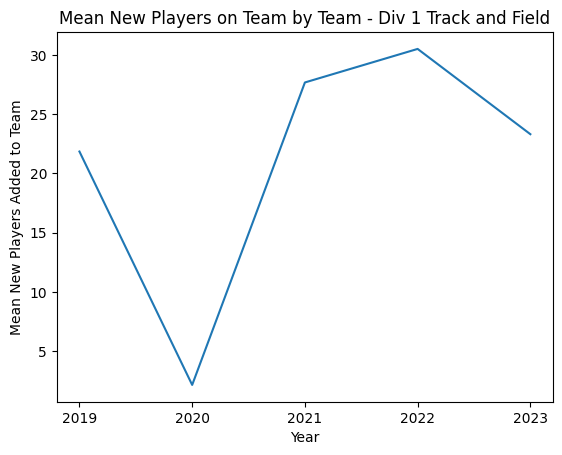

In [57]:
# prompt: plot the new number of players by year using matplotlib



plt.plot(df_mean_new_players_by_year.Year, df_mean_new_players_by_year.NewPlayers)
plt.xlabel('Year')
plt.ylabel('Mean New Players Added to Team')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title("Mean New Players on Team by Team - Div 1 Track and Field")
plt.show()


In [58]:
df_div1_roster.groupby(["Year"]).size().reset_index()

,Year,0
0,2018,26359
1,2019,27409
2,2020,18577
3,2021,21613
4,2022,25577
5,2023,26368


In [59]:
# prompt: get a count from df_div1_roster of unique team values per year

df_div1_roster.groupby(["Year"])["Team"].nunique()

Year
2018    351
2019    350
2020    349
2021    347
2022    349
2023    348
Name: Team, dtype: int64

# Find the grade composition by year and chart it

In [60]:
df_athelete_event_clean.head()

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
0,0,/athlete/21636225/track-and-field,Shot Put - 16lb,8,14.42mPR,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
1,1,/athlete/21636225/track-and-field,Shot Put - 16lb,16,43.38m,Apr 1,UCONN Dog Fight,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
2,2,/athlete/21636225/track-and-field,Shot Put - 16lb,4,48.67m,Apr 8,UMASS Flagship Opener,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
3,3,/athlete/21636225/track-and-field,Shot Put - 16lb,3,49.51mPR,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
4,4,/athlete/21636225/track-and-field,Shot Put - 16lb,7,48.70m,May 11,West Point Twilight,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany


In [61]:
df_school_year_athele_schoollevel = df_athelete_event_clean.copy()
len(df_school_year_athele_schoollevel)


958652

In [62]:
df_school_year_athele_schoollevel = df_school_year_athele_schoollevel[df_school_year_athele_schoollevel["SchoolLevel"] == "Collegiate"]
len(df_school_year_athele_schoollevel)


807951

In [63]:
df_school_year_athele_schoollevel.drop_duplicates(subset=[ 'AthleteId', 'EventYear',  'SchoolName'], inplace=True)

In [64]:
df_school_year_athele_schoollevel.head(50)

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
0,0,/athlete/21636225/track-and-field,Shot Put - 16lb,8,14.42mPR,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
15,15,/athlete/16022935/track-and-field,800 Meters,14,1:55.80PR,May 7,America East Outdoor Championships,1 P,16022935,2023,Outdoor,So,Collegiate,Albany
24,24,/athlete/16022935/track-and-field,1500 Meters,8,2:22.22 SR,Mar 20,Fordham Icahn Invitational,1 F,16022935,2021,Outdoor,So,Collegiate,Albany
26,26,/athlete/16022935/track-and-field,1000 Meters,20,2:22.22 SR,Dec 7,Boston University Sharon Colyear-Danville Sea...,O F,16022935,2020,Indoor,Fr,Collegiate,Albany
29,29,/athlete/19271236/track-and-field,200 Meters,21,22.99 (0.9) PR,Apr 1,UCONN Dog Fight,1 F,19271236,2023,Outdoor,So,Collegiate,Albany
47,47,/athlete/19271236/track-and-field,"110m Hurdles - 42""",3,22.22 (2.2),Apr 2,UCONN Dog Fight,1 F,19271236,2022,Outdoor,Fr,Collegiate,Albany
71,71,/athlete/16154842/track-and-field,1500 Meters,11,3:54.88PR,May 7,America East Outdoor Championships,1 P,16154842,2023,Outdoor,Jr,Collegiate,Albany
81,81,/athlete/16154842/track-and-field,1500 Meters,--,XXX,Apr 30,RPI Capital District Classic,1 F,16154842,2022,Outdoor,So,Collegiate,Albany
90,90,/athlete/16154842/track-and-field,5000 Meters,7,22:22.22 SR,Mar 20,Fordham Icahn Invitational,1 F,16154842,2021,Outdoor,Fr,Collegiate,Albany
93,93,/athlete/16154842/track-and-field,3000 Meters,29,2:22.22 SR,Feb 1,Bruce Lehane Scarlet and White,1 F,16154842,2020,Indoor,Fr,Collegiate,Albany


In [65]:
df_school_year_athele_schoollevel.dtypes

Unnamed: 0       int64
AtheleteLink    object
Event           object
placement       object
Time            object
Date            object
MeetName        object
MeetCode        object
AthleteId       object
EventYear        int64
SeasonName      object
StudentGrade    object
SchoolLevel     object
SchoolName      object
dtype: object

In [66]:
df_school_year_athele_schoollevel["EventYear"] = df_school_year_athele_schoollevel["EventYear"].astype(int)

In [67]:
df_school_year_athele_schoollevel["SchoolName"] = df_school_year_athele_schoollevel["SchoolName"].str.strip()

In [68]:
len(df_school_year_athele_schoollevel)

79030

## join with roster table to get the corresponding value

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns

https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns

In [69]:
len(df_div1_roster)

145903

In [70]:
df_div1_roster.head(5)

,Unnamed: 0,Team,TeamLink,Year,AthleteName,AthleteLink
0,0,Albany,/team/20591/track-and-field-outdoor,2023,Alessandro Saltsman,/athlete/21636225/track-and-field
1,1,Albany,/team/20591/track-and-field-outdoor,2023,Antonio Beltran,/athlete/16022935/track-and-field
2,2,Albany,/team/20591/track-and-field-outdoor,2023,Antwone Messado,/athlete/19271236/track-and-field
3,3,Albany,/team/20591/track-and-field-outdoor,2023,Brandon Garcia,/athlete/16154842/track-and-field
4,4,Albany,/team/20591/track-and-field-outdoor,2023,Charlie Hatzmann,/athlete/19271242/track-and-field


In [71]:
df_div1_roster_StudentGrade = pd.merge(df_div1_roster, df_school_year_athele_schoollevel[["StudentGrade", "AtheleteLink", "EventYear", "SchoolName"]], how="left", left_on=["AthleteLink", "Year", "Team"], right_on=["AtheleteLink", "EventYear", "SchoolName"])



In [72]:
df_div1_roster_StudentGrade = pd.merge(df_div1_roster, df_school_year_athele_schoollevel[["StudentGrade", "AtheleteLink", "EventYear", "SchoolName"]], how="left", left_on=["AthleteLink", "Year", "Team"], right_on=["AtheleteLink", "EventYear", "SchoolName"])
df_div1_roster_StudentGrade.head()


,Unnamed: 0,Team,TeamLink,Year,AthleteName,AthleteLink,StudentGrade,AtheleteLink,EventYear,SchoolName
0,0,Albany,/team/20591/track-and-field-outdoor,2023,Alessandro Saltsman,/athlete/21636225/track-and-field,Fr,/athlete/21636225/track-and-field,2023.0,Albany
1,1,Albany,/team/20591/track-and-field-outdoor,2023,Antonio Beltran,/athlete/16022935/track-and-field,So,/athlete/16022935/track-and-field,2023.0,Albany
2,2,Albany,/team/20591/track-and-field-outdoor,2023,Antwone Messado,/athlete/19271236/track-and-field,So,/athlete/19271236/track-and-field,2023.0,Albany
3,3,Albany,/team/20591/track-and-field-outdoor,2023,Brandon Garcia,/athlete/16154842/track-and-field,Jr,/athlete/16154842/track-and-field,2023.0,Albany
4,4,Albany,/team/20591/track-and-field-outdoor,2023,Charlie Hatzmann,/athlete/19271242/track-and-field,NaN,NaN,NaN,NaN


In [73]:
len(df_div1_roster_StudentGrade)

145903

In [74]:
len(df_div1_roster_StudentGrade[df_div1_roster_StudentGrade["StudentGrade"].isnull() == False])



55592

### Check that there are no duplicates

In [75]:
df_duplicates = df_div1_roster_StudentGrade[df_div1_roster_StudentGrade.duplicated(subset=["AthleteLink", "Year", "Team"], keep=False)]
df_duplicates

,Unnamed: 0,Team,TeamLink,Year,AthleteName,AthleteLink,StudentGrade,AtheleteLink,EventYear,SchoolName


In [76]:
df_div1_roster_StudentGrade.head(50)

,Unnamed: 0,Team,TeamLink,Year,AthleteName,AthleteLink,StudentGrade,AtheleteLink,EventYear,SchoolName
0,0,Albany,/team/20591/track-and-field-outdoor,2023,Alessandro Saltsman,/athlete/21636225/track-and-field,Fr,/athlete/21636225/track-and-field,2023.0,Albany
1,1,Albany,/team/20591/track-and-field-outdoor,2023,Antonio Beltran,/athlete/16022935/track-and-field,So,/athlete/16022935/track-and-field,2023.0,Albany
2,2,Albany,/team/20591/track-and-field-outdoor,2023,Antwone Messado,/athlete/19271236/track-and-field,So,/athlete/19271236/track-and-field,2023.0,Albany
3,3,Albany,/team/20591/track-and-field-outdoor,2023,Brandon Garcia,/athlete/16154842/track-and-field,Jr,/athlete/16154842/track-and-field,2023.0,Albany
4,4,Albany,/team/20591/track-and-field-outdoor,2023,Charlie Hatzmann,/athlete/19271242/track-and-field,NaN,NaN,NaN,NaN
5,5,Albany,/team/20591/track-and-field-outdoor,2023,Christian Quinn,/athlete/19271244/track-and-field,So,/athlete/19271244/track-and-field,2023.0,Albany
6,6,Albany,/team/20591/track-and-field-outdoor,2023,Cole Heintzelman,/athlete/17799624/track-and-field,Jr,/athlete/17799624/track-and-field,2023.0,Albany
7,7,Albany,/team/20591/track-and-field-outdoor,2023,Daniel Cephus,/athlete/19392759/track-and-field,So,/athlete/19392759/track-and-field,2023.0,Albany
8,8,Albany,/team/20591/track-and-field-outdoor,2023,Dean Athanailos,/athlete/16154843/track-and-field,Jr,/athlete/16154843/track-and-field,2023.0,Albany
9,9,Albany,/team/20591/track-and-field-outdoor,2023,Easton Reagan,/athlete/16311958/track-and-field,Sr,/athlete/16311958/track-and-field,2023.0,Albany


In [77]:
# prompt: get a count of rows in df_div1_roster_StudentGrade by year where StudentGrade is not blank

df_div1_roster_StudentGrade.groupby(["Year"]).size().reset_index()


,Year,0
0,2018,26359
1,2019,27409
2,2020,18577
3,2021,21613
4,2022,25577
5,2023,26368


## Create a diagram of the student grade composition by year to see if there are trends related to 2020

In [78]:
# prompt: find the percentage of different StudentGrade in df_div1_roster_StudentGrade by year

df_StudentGradeByYear = pd.DataFrame(df_div1_roster_StudentGrade.groupby(["Year"])["StudentGrade"].value_counts(normalize=True))
df_StudentGradeByYear

StudentGrade
Year StudentGrade              
2018 Fr                0.263184
     So                0.260921
     Jr                0.249705
     Sr                0.222157
     -                 0.003640
     Gr                0.000197
     RS                0.000197
2019 Fr                0.269973
     So                0.256509
     Jr                0.235323
     Sr                0.229680
     -                 0.008019
     RS                0.000297
     12                0.000099
     Gr                0.000099
2020 Jr                0.324740
     So                0.316436
     Sr                0.296713
     Fr                0.052249
     -                 0.009862
2021 Fr                0.373142
     Sr                0.259482
     Jr                0.231804
     So                0.125833
     -                 0.009610
     RS                0.000128
2022 So                0.318764
     Fr                0.277981
     Sr                0.239119
     Jr                0.149689
     -                 0.013990
     RS                0.000274
     12                0.000091
     19+               0.000091
2023 Jr                0.298048
     Fr                0.261312
     So                0.259924
     Sr                0.172388
     -                 0.006107
     RS                0.002221

In [79]:
df_StudentGradeByYear.rename(columns={"StudentGrade": "Percentage"}, inplace=True)
df_StudentGradeByYear.reset_index(inplace=True)


In [80]:
df_StudentGradeByYear

,Year,StudentGrade,Percentage
0,2018,Fr,0.263184
1,2018,So,0.260921
2,2018,Jr,0.249705
3,2018,Sr,0.222157
4,2018,-,0.003640
5,2018,Gr,0.000197
6,2018,RS,0.000197
7,2019,Fr,0.269973
8,2019,So,0.256509
9,2019,Jr,0.235323


## First cut at diagrams - includes some weird student grades (.e.g 12) but not a lot of them

<ipython-input-81-711bc896f6d5>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df_StudentGradeByYear.groupby(['StudentGrade']):


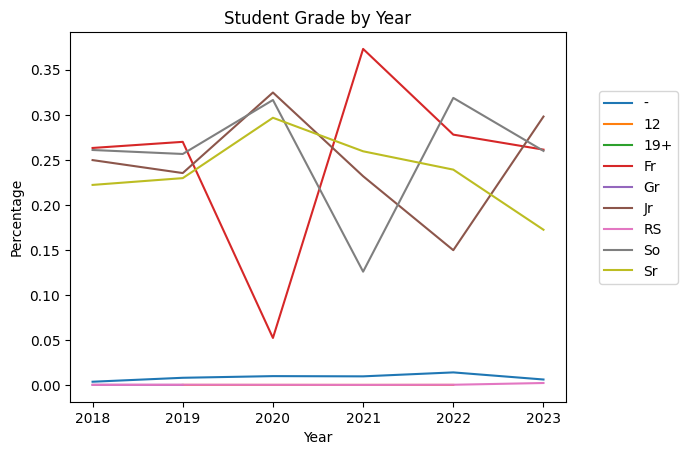

In [81]:
fig, ax = plt.subplots()
for key, grp in df_StudentGradeByYear.groupby(['StudentGrade']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Percentage', label=key)

plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.24,0.3), loc='lower right')
plt.title("Student Grade by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()


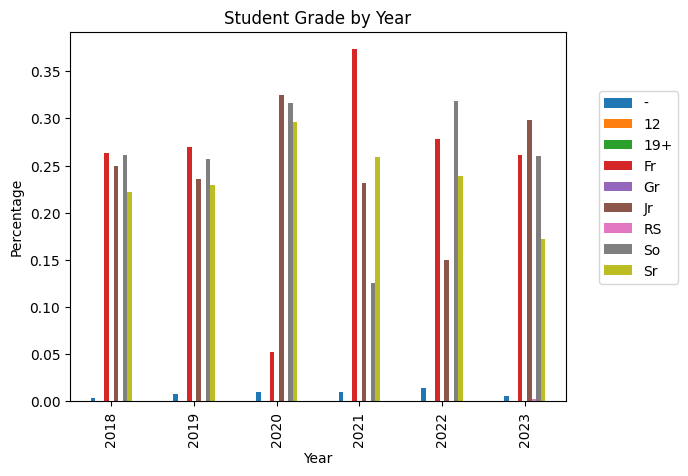

In [82]:
df_StudentGradeByYear.pivot(index='Year', columns='StudentGrade', values='Percentage').plot(kind="bar")
plt.title("Student Grade by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.24,0.3), loc='lower right')
plt.show()

## remove the records for 12, 19+, -


In [83]:
df_StudentGradeByYear_short = df_StudentGradeByYear[df_StudentGradeByYear["StudentGrade"].isin(["Fr", "Gr", "Jr", "RS", "So", "Sr"] )]
df_StudentGradeByYear_short["StudentGrade"].value_counts()



Fr    6
So    6
Jr    6
Sr    6
RS    5
Gr    2
Name: StudentGrade, dtype: int64

In [84]:
conditions = [
    (df_StudentGradeByYear_short["StudentGrade"] == "Fr"),
    (df_StudentGradeByYear_short["StudentGrade"] == "Gr"),
    (df_StudentGradeByYear_short["StudentGrade"] == "Jr"),
    (df_StudentGradeByYear_short["StudentGrade"] == "RS"),
    (df_StudentGradeByYear_short["StudentGrade"] == "So"),
    (df_StudentGradeByYear_short["StudentGrade"] == "Sr")
]
values = [1, 6, 3, 5, 2, 4]

In [85]:
df_StudentGradeByYear_short["StudentGrade"] = df_StudentGradeByYear_short["StudentGrade"].str.strip()

<ipython-input-85-60a41f59824b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_StudentGradeByYear_short["StudentGrade"] = df_StudentGradeByYear_short["StudentGrade"].str.strip()


In [86]:
df_StudentGradeByYear_short['StudentGradeSort'] = np.select(conditions, values)
df_StudentGradeByYear_short = df_StudentGradeByYear_short.sort_values(["Year", "StudentGradeSort"])
df_StudentGradeByYear_short

<ipython-input-86-beeed4ffcd77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_StudentGradeByYear_short['StudentGradeSort'] = np.select(conditions, values)


,Year,StudentGrade,Percentage,StudentGradeSort
0,2018,Fr,0.263184,1
1,2018,So,0.260921,2
2,2018,Jr,0.249705,3
3,2018,Sr,0.222157,4
6,2018,RS,0.000197,5
5,2018,Gr,0.000197,6
7,2019,Fr,0.269973,1
8,2019,So,0.256509,2
9,2019,Jr,0.235323,3
10,2019,Sr,0.229680,4


<Axes: >

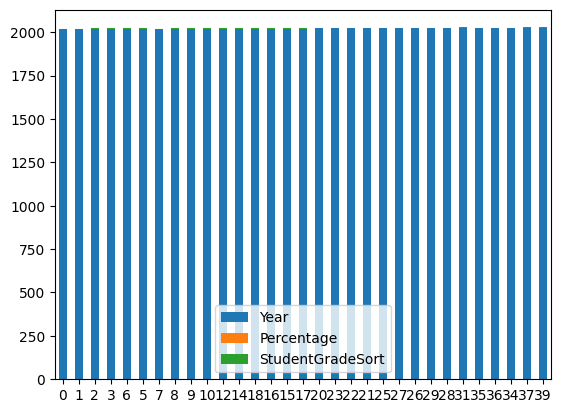

In [87]:
df_StudentGradeByYear_short.plot.bar(stacked=True, rot=0)

## Good diagrams below

<ipython-input-88-d2110e0779a6>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df_StudentGradeByYear_short.groupby(['StudentGrade']):


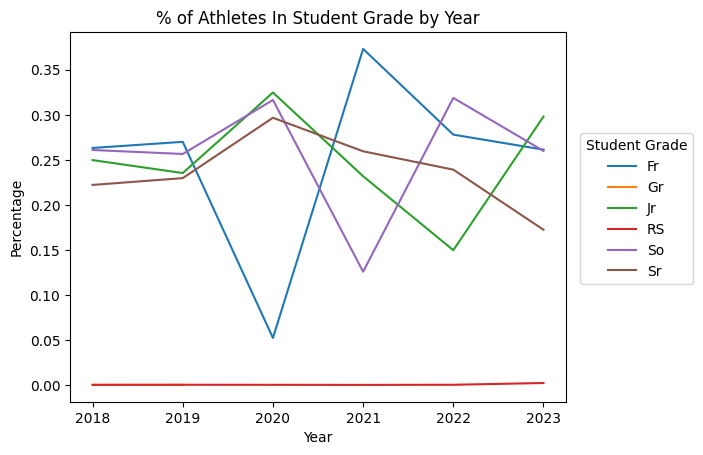

In [88]:
fig, ax = plt.subplots()
for key, grp in df_StudentGradeByYear_short.groupby(['StudentGrade']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Percentage', label=key)

plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.27,0.3), loc='lower right', title = "Student Grade")
plt.title("% of Athletes In Student Grade by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()

In [89]:
df_StudentGradeByYear_short.pivot(index='Year', columns='StudentGrade', values='Percentage')

StudentGrade,Fr,Gr,Jr,RS,So,Sr
Year,,,,,,
2018,0.263184,0.000197,0.249705,0.000197,0.260921,0.222157
2019,0.269973,0.000099,0.235323,0.000297,0.256509,0.229680
2020,0.052249,NaN,0.324740,NaN,0.316436,0.296713
2021,0.373142,NaN,0.231804,0.000128,0.125833,0.259482
2022,0.277981,NaN,0.149689,0.000274,0.318764,0.239119
2023,0.261312,NaN,0.298048,0.002221,0.259924,0.172388


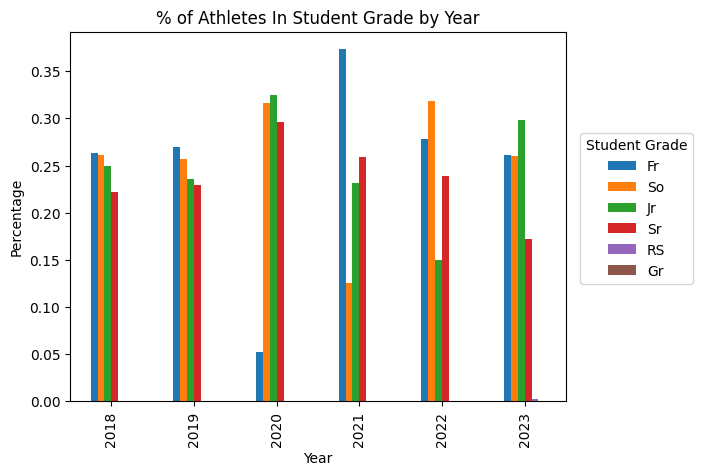

In [90]:
df_StudentGradeByYear_short.pivot(index='Year', columns='StudentGrade', values='Percentage')[["Fr", "So", "Jr", "Sr", "RS", "Gr"]].plot(kind="bar")
plt.title("% of Athletes In Student Grade by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.27,0.3), loc='lower right', title = "Student Grade")
plt.show()

## Find the number of student records where there is both college and high school data

In [91]:
len(df_athelete_event_clean)

958652

In [92]:
df_athelete_event_clean['AtheleteLink'].nunique()

31246

In [93]:
df_athelete_event_clean.groupby('SchoolLevel')['AtheleteLink'].nunique()

SchoolLevel
Collegiate    31221
HighSchool     1708
Other          1814
Name: AtheleteLink, dtype: int64

In [94]:
# percentage of records that have hs component
1708/31221

0.05470676788059319

In [95]:
type(list(range(2013, 2023, 1))[0])

int

### stacked bar charts

In [96]:
df_StudentGradeByYear_short

,Year,StudentGrade,Percentage,StudentGradeSort
0,2018,Fr,0.263184,1
1,2018,So,0.260921,2
2,2018,Jr,0.249705,3
3,2018,Sr,0.222157,4
6,2018,RS,0.000197,5
5,2018,Gr,0.000197,6
7,2019,Fr,0.269973,1
8,2019,So,0.256509,2
9,2019,Jr,0.235323,3
10,2019,Sr,0.229680,4


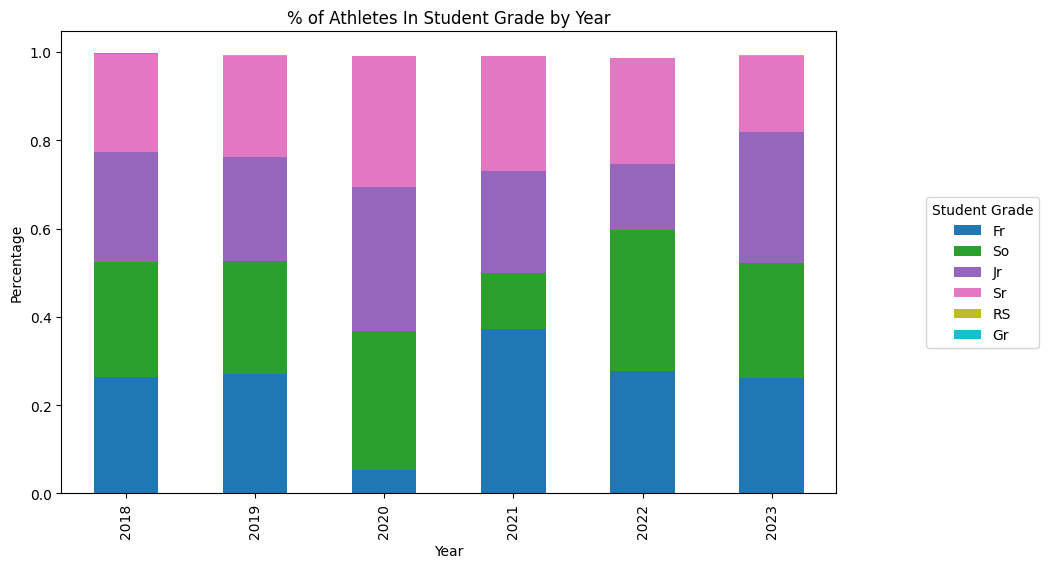

In [97]:
df_StudentGradeByYear_short.pivot(index='Year', columns='StudentGrade', values='Percentage')[["Fr", "So", "Jr", "Sr", "RS", "Gr"]].plot(kind="bar",
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))
plt.title("% of Athletes In Student Grade by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.27,0.3), loc='lower right', title = "Student Grade")
plt.show()


In [98]:
cross_tab_prop = pd.crosstab(index=df_StudentGradeByYear_short['Year'],
                             columns=df_StudentGradeByYear_short['StudentGrade'],
                             normalize="index")
cross_tab_prop

StudentGrade,Fr,Gr,Jr,RS,So,Sr
Year,,,,,,
2018,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2019,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2020,0.250000,0.000000,0.250000,0.000000,0.250000,0.250000
2021,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000
2022,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000
2023,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000


## find count of records by year

In [99]:
df_athelete_event_clean

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,AthleteId,EventYear,SeasonName,StudentGrade,SchoolLevel,SchoolName
0,0,/athlete/21636225/track-and-field,Shot Put - 16lb,8,14.42mPR,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
1,1,/athlete/21636225/track-and-field,Shot Put - 16lb,16,43.38m,Apr 1,UCONN Dog Fight,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
2,2,/athlete/21636225/track-and-field,Shot Put - 16lb,4,48.67m,Apr 8,UMASS Flagship Opener,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
3,3,/athlete/21636225/track-and-field,Shot Put - 16lb,3,49.51mPR,May 7,America East Outdoor Championships,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
4,4,/athlete/21636225/track-and-field,Shot Put - 16lb,7,48.70m,May 11,West Point Twilight,1 F,21636225,2023,Outdoor,Fr,Collegiate,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9152,9152,/athlete/21636300/track-and-field,400 Meters,3,2:22.22,Dec 3,Crowell Open,1 F,21636300,2023,Indoor,Fr,Collegiate,Manhattan
9153,9153,/athlete/21636300/track-and-field,400 Meters,25,2:22.22PR,Feb 3,Metropolitan Championships,1 F,21636300,2023,Indoor,Fr,Collegiate,Manhattan
9154,9154,/athlete/21636300/track-and-field,400 Meters,4,22:22.22,Feb 3,"Metropolitan Championships Nicola Scaglione, ...",1 F,21636300,2023,Indoor,Fr,Collegiate,Manhattan
9155,9155,/athlete/21636300/track-and-field,400 Meters,7,22:22.22,Feb 19,MAAC Indoor Track and Field Championships Nic...,1 F,21636300,2023,Indoor,Fr,Collegiate,Manhattan


In [100]:
df_div1_roster_StudentGrade

,Unnamed: 0,Team,TeamLink,Year,AthleteName,AthleteLink,StudentGrade,AtheleteLink,EventYear,SchoolName
0,0,Albany,/team/20591/track-and-field-outdoor,2023,Alessandro Saltsman,/athlete/21636225/track-and-field,Fr,/athlete/21636225/track-and-field,2023.0,Albany
1,1,Albany,/team/20591/track-and-field-outdoor,2023,Antonio Beltran,/athlete/16022935/track-and-field,So,/athlete/16022935/track-and-field,2023.0,Albany
2,2,Albany,/team/20591/track-and-field-outdoor,2023,Antwone Messado,/athlete/19271236/track-and-field,So,/athlete/19271236/track-and-field,2023.0,Albany
3,3,Albany,/team/20591/track-and-field-outdoor,2023,Brandon Garcia,/athlete/16154842/track-and-field,Jr,/athlete/16154842/track-and-field,2023.0,Albany
4,4,Albany,/team/20591/track-and-field-outdoor,2023,Charlie Hatzmann,/athlete/19271242/track-and-field,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145898,145898,Texas-Rio Grande Valley (fka TX-Pan Am),/team/21464/track-and-field-outdoor,2018,Teresa Sova,/athlete/7510838/track-and-field,NaN,NaN,NaN,NaN
145899,145899,Texas-Rio Grande Valley (fka TX-Pan Am),/team/21464/track-and-field-outdoor,2018,Thalia Polanco,/athlete/8926522/track-and-field,NaN,NaN,NaN,NaN
145900,145900,Texas-Rio Grande Valley (fka TX-Pan Am),/team/21464/track-and-field-outdoor,2018,Valerie Mancha,/athlete/9144311/track-and-field,NaN,NaN,NaN,NaN
145901,145901,Texas-Rio Grande Valley (fka TX-Pan Am),/team/21464/track-and-field-outdoor,2018,Vanessa Rodriguez,/athlete/9571877/track-and-field,NaN,NaN,NaN,NaN


In [101]:
records_count = df_athelete_event_clean.groupby('EventYear')['AtheleteLink'].nunique()


In [103]:
records_count

EventYear
1970        9
1976        2
1977        3
1978        3
1979        1
1980        1
1981        1
1982        5
1983        4
1984        2
1985        2
1986        7
1988        1
1990        3
1991        1
1992        1
1993        2
1994        3
1995        4
1996        3
1997        6
1998        5
1999        7
2000        3
2001        6
2002        8
2003        6
2004        7
2005        6
2006       10
2007       12
2008       27
2009       44
2010       97
2011      178
2012      305
2013      481
2014      922
2015     2670
2016     7398
2017    10286
2018    11621
2019    11424
2020     9567
2021     9089
2022    11626
2023    11091
Name: AtheleteLink, dtype: int64

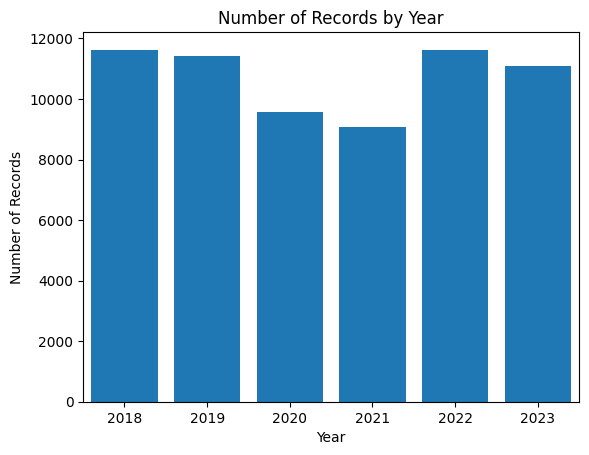

In [102]:
fig, ax = plt.subplots()
ax.bar(records_count.index, records_count.values)
plt.title("Number of Records by Year")
plt.xlabel("Year")
plt.ylabel("Number of Records")
ax.set_xlim(2017.5, 2023.5)
plt.show()
